In [26]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)
library(cowplot)

In [27]:
#install.packages("caret")
#library(caret)

In [28]:
data <- read_csv("data/vaccination-coverage-byAgeAndSex-overTimeDownload.csv")
data

Rows: 73584 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): prename, prfname, sex, age, numtotal_atleast1dose, numtotal_parti...
dbl   (4): pruid, numtotal_additional, numtotal_2nd_additional, numtotal_rec...
date  (1): week_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pruid,prename,prfname,week_end,sex,age,numtotal_atleast1dose,numtotal_partially,numtotal_fully,numtotal_additional,numtotal_2nd_additional,numtotal_recent_fullyoradditional,proptotal_atleast1dose,proptotal_partially,proptotal_fully,proptotal_additional,proptotal_2nd_additional,proptotal_recent_fullyoradditional
<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Canada,Canada,2020-12-19,All sexes,0–15,2,2,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,16–69,11766,11766,0,NA,NA,NA,0.1,0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,70–74,174,174,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,Nunavut,Nunavut,2022-10-09,Not reported,All ages,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-10-09,Not reported,Not reported,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-10-09,Not reported,Unknown,0,0,0.0,0,0,NA,na,na,na,na,na,na


In [29]:
data_allsex_canada<- data|>
filter(prename=="Canada")|>
filter(sex=="All sexes")|>
mutate(numtotal_atleast1dose=as.numeric(numtotal_atleast1dose))|>
mutate(numtotal_fully=as.numeric(numtotal_fully))|>
mutate(numtotal_additional=as.numeric(numtotal_additional))|>
mutate(numtotal_partially=as.numeric(numtotal_partially))

data2<-data_allsex_canada |> 
    select(week_end:numtotal_recent_fullyoradditional, -sex)

raw codes

In [47]:
newdata<- data2|>
    mutate(days=as.numeric(week_end)-18615)|>
    select(-week_end)

In [48]:
newnewdata <- newdata|>
mutate(days=days)|>
mutate(numtotal_atleast1dose=as.vector(numtotal_atleast1dose))|>
mutate(dose1=as.vector(numtotal_partially))|>
mutate(dose2=as.vector(numtotal_fully))|>
mutate(dose3=as.vector(numtotal_additional))|>
mutate(dose4=as.vector(numtotal_2nd_additional))|>
mutate(dose5=as.vector(numtotal_recent_fullyoradditional))|>
select(-numtotal_recent_fullyoradditional,-numtotal_2nd_additional,-numtotal_fully,-numtotal_partially,-numtotal_additional)
newnewdata

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0–15,2,0,2,0,NA,NA,NA
16–69,11766,0,11766,0,NA,NA,NA
70–74,174,0,174,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32320750,659,2699276,24262099,19293898,5571873,6682289
Not reported,0,659,0,0,0,0,NA
Unknown,15020,659,2670,12350,7873,3344,5978


In [49]:
na_row_total<- nrow(newnewdata[is.na(newnewdata$numtotal_atleast1dose),])
na_row_total
na_row_1<- nrow(newnewdata[is.na(newnewdata$dose1),])
na_row_1
na_row_2<- nrow(newnewdata[is.na(newnewdata$dose2),])
na_row_2
na_row_3<- nrow(newnewdata[is.na(newnewdata$dose3),])
na_row_3
na_row_4<- nrow(newnewdata[is.na(newnewdata$dose4),])
na_row_4
na_row_5<- nrow(newnewdata[is.na(newnewdata$dose5),])
na_row_5

[1] 0

[1] 0

[1] 0

[1] 564

[1] 629

[1] 866

In [50]:
newdata18<-newnewdata|>filter(age=="18–29")
newdata18

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18–29,489425,119,404849,84576,NA,NA,NA
18–29,599663,126,509309,90354,NA,NA,NA
18–29,723344,133,623251,100093,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
18–29,5327857,603,219854,5108003,2160093,89940,232752
18–29,5327031,631,220689,5106342,2171600,122158,228081
18–29,5213720,659,652822,4072640,2250706,177328,348460


In [51]:
glm(numtotal_atleast1dose~days, data=newdata18)



Call:  glm(formula = numtotal_atleast1dose ~ days, data = newdata18)

Coefficients:
(Intercept)         days  
    2063425         7184  

Degrees of Freedom: 59 Total (i.e. Null);  58 Residual
Null Deviance:	    1.002e+14 
Residual Deviance: 4.323e+13 	AIC: 1814

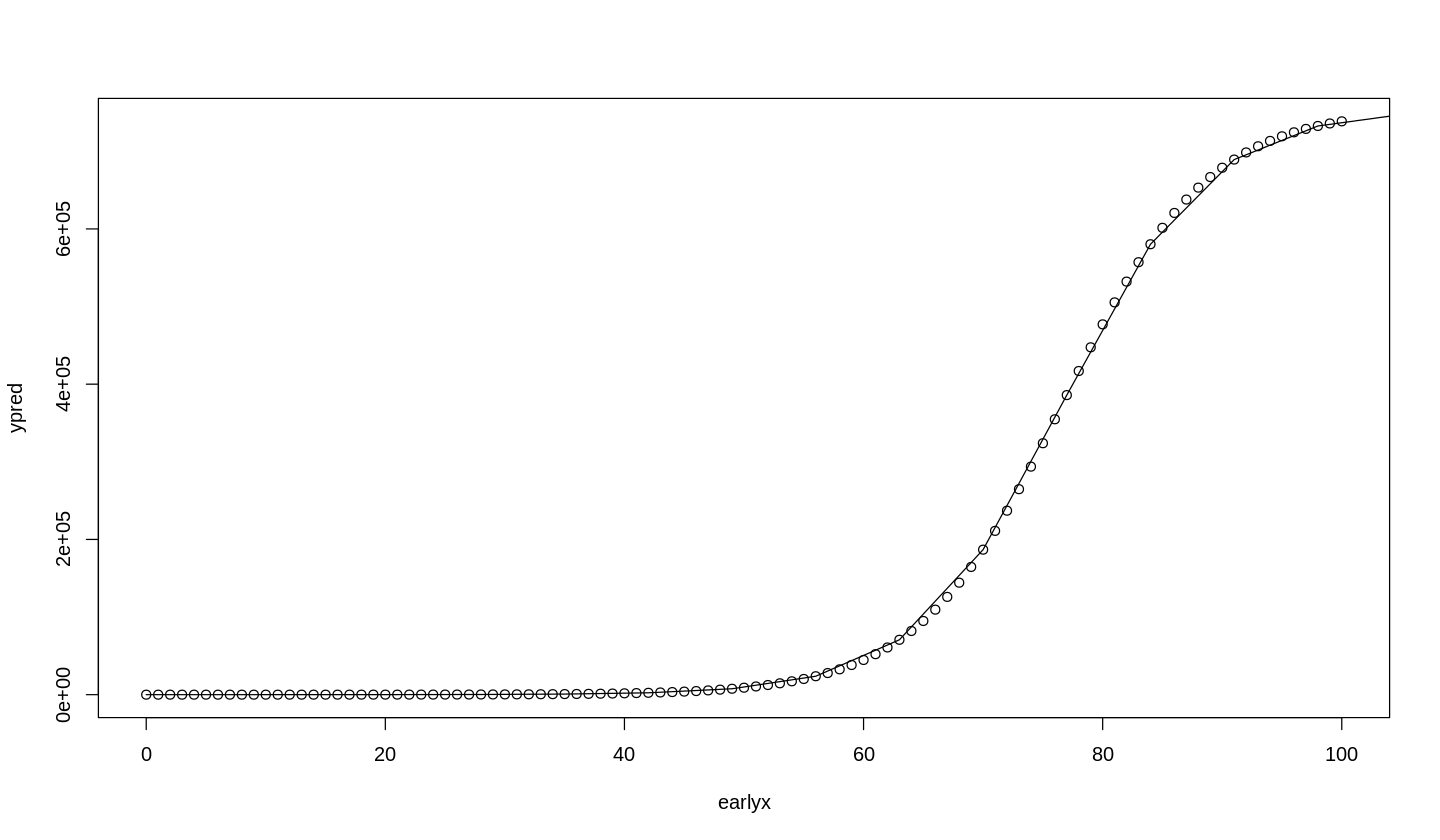

In [67]:
x<-newnewdata$days
y<-newnewdata$dose1

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [63]:
x<-newnewdata$days
y<-newnewdata$dose2

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


In [58]:
x<-newnewdata$days
y<-newnewdata$dose3

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


In [59]:
x<-newnewdata$days
y<-newnewdata$dose4

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


In [60]:
x<-newnewdata$days
y<-newnewdata$dose5

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


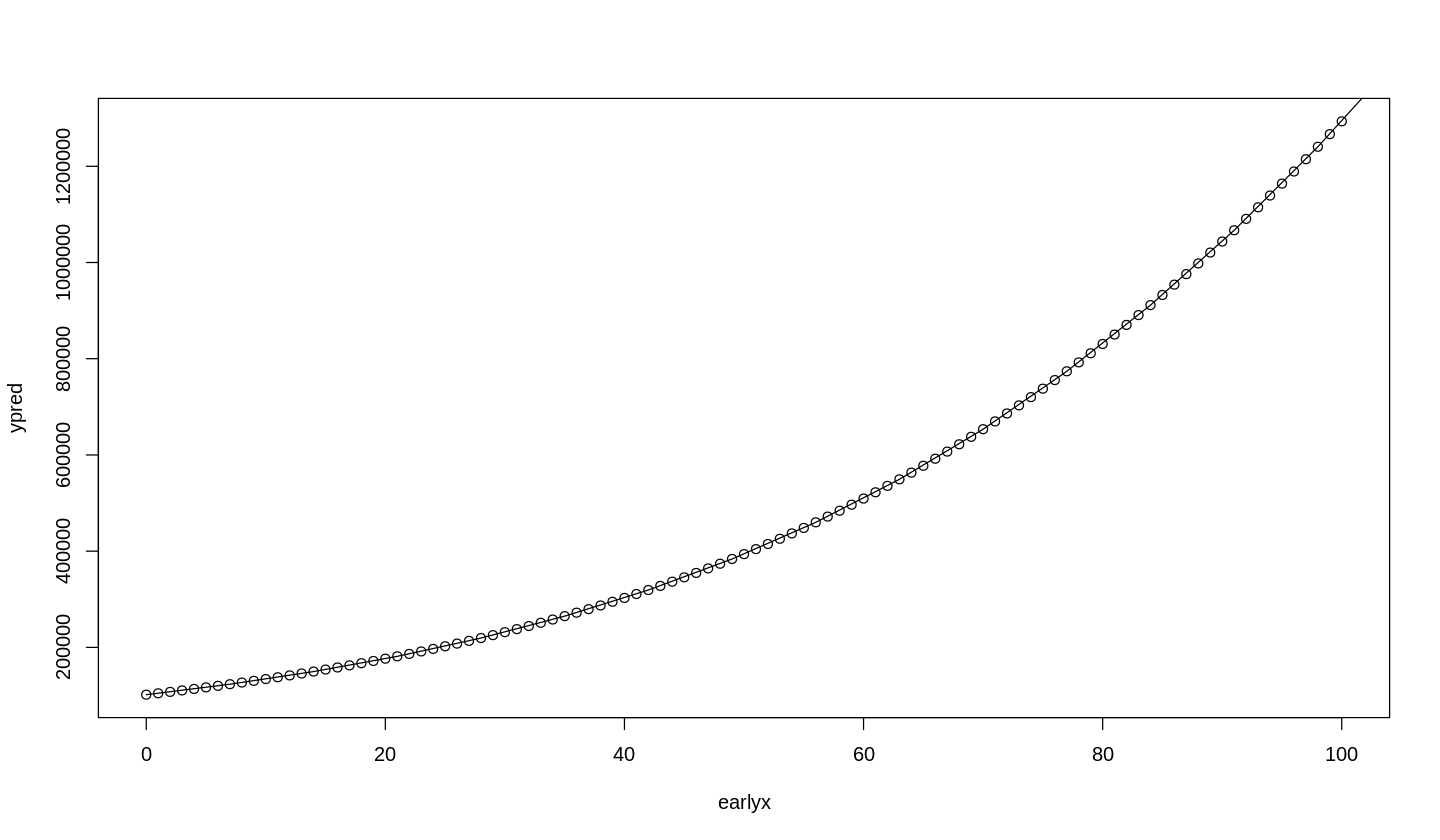

In [61]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [34]:
bbb <- newnewdata|> nls(numtotal_atleast1dose ~ days/(1 + exp((xmid - days)/scal)), 
                            start = list(xmid = 0, scal = 1, height = 100000))
bbb


ERROR: Error in nls(newnewdata, numtotal_atleast1dose ~ days/(1 + exp((xmid - : 'data' must be a list or an environment


In [38]:
nls(numtotal_atleast1dose ~ days, data=newnewdata)

ERROR: Error in object[[3L]][[1L]]: object of type 'symbol' is not subsettable


In [ ]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(newnewdata, aes(x=days,y=numtotal_atleast1dose,color=age))+
geom_point()+
ggtitle("at least 1 dose")
ggplot(newnewdata, aes(x=days,y=dose1,color=age))+
geom_point()+
ggtitle("dose 1")
ggplot(newnewdata, aes(x=days,y=dose2,color=age))+
geom_point()+
ggtitle("dose 2")
ggplot(newnewdata, aes(x=days,y=dose3,color=age))+
geom_point()+
ggtitle("dose 3")
ggplot(newnewdata, aes(x=days,y=dose4,color=age))+
geom_point()+
ggtitle("dose 4")
ggplot(newnewdata, aes(x=days,y=dose5,color=age))+
geom_point()+
ggtitle("dose 5")

#glm
#nls 

In [ ]:
nls(formula, data, start, control, algorithm,
    trace, subset, weights, na.action, model,
    lower, upper, ...)
newnewdata

In [37]:
#?nls
#pivot longer to make it tibble 
#newnewdata
#?glm

In [14]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
bbb

Nonlinear regression model
  model: y ~ height/(1 + exp((xmid - x)/scal))
   data: parent.frame()
     xmid      scal    height 
1.350e+02 3.526e+01 4.787e+06 
 residual sum-of-squares: 4.102e+16

Number of iterations to convergence: 9 
Achieved convergence tolerance: 6.485e-06

xmid         scal       height 
1.350338e+02 3.525947e+01 4.786866e+06

[1]  101741.1  104603.9  107545.5  110567.8  113673.0  116863.2  120140.7
  [8]  123507.6  126966.3  130519.2  134168.6  137917.1  141767.1  145721.2
 [15]  149782.0  153952.2  158234.6  162631.9  167147.0  171782.8  176542.3
 [22]  181428.4  186444.3  191593.1  196878.0  202302.3  207869.2  213582.2
 [29]  219444.7  225460.2  231632.2  237964.4  244460.3  251123.8  257958.7
 [36]  264968.6  272157.7  279529.7  287088.7  294838.8  302783.9  310928.4
 [43]  319276.4  327832.0  336599.7  345583.6  354788.3  364218.0  373877.2
 [50]  383770.3  393901.8  404276.2  414898.1  425772.0  436902.3  448293.7
 [57]  459950.7  471877.9  484079.7  496560.8  509325.5  522378.5  535724.0
 [64]  549366.6  563310.6  577560.3  592119.9  606993.6  622185.4  637699.6
 [71]  653539.8  669710.0  686213.9  703055.0  720236.8  737762.7  755635.9
 [78]  773859.2  792435.7  811367.9  830658.4  850309.4  870323.0  890701.1
 [85]  911445.4  932557.1  954037.4  975887.2  998107.1 1020697.5 1043658.3
 [92] 1066989.3 1090689.8 1114759.1 1139195.8 1163998.4 1189164.9 1214693.2
 [99] 1240580.4 1266823.8 1293419.8

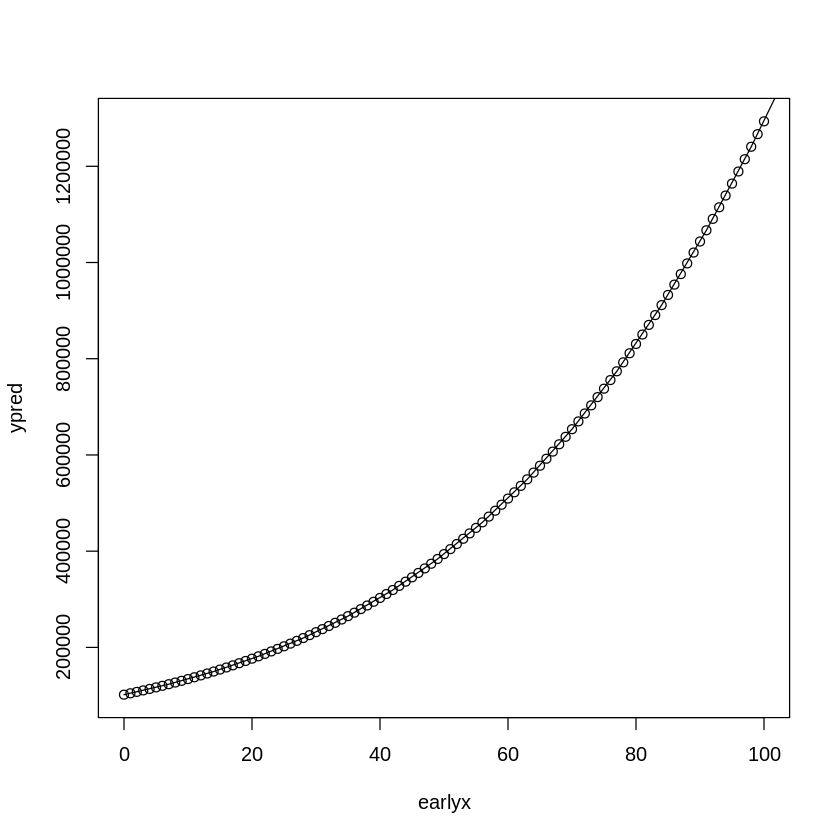

In [15]:
coef(bbb)
earlyx<-c(0:100)
ypred<-coef(bbb)[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

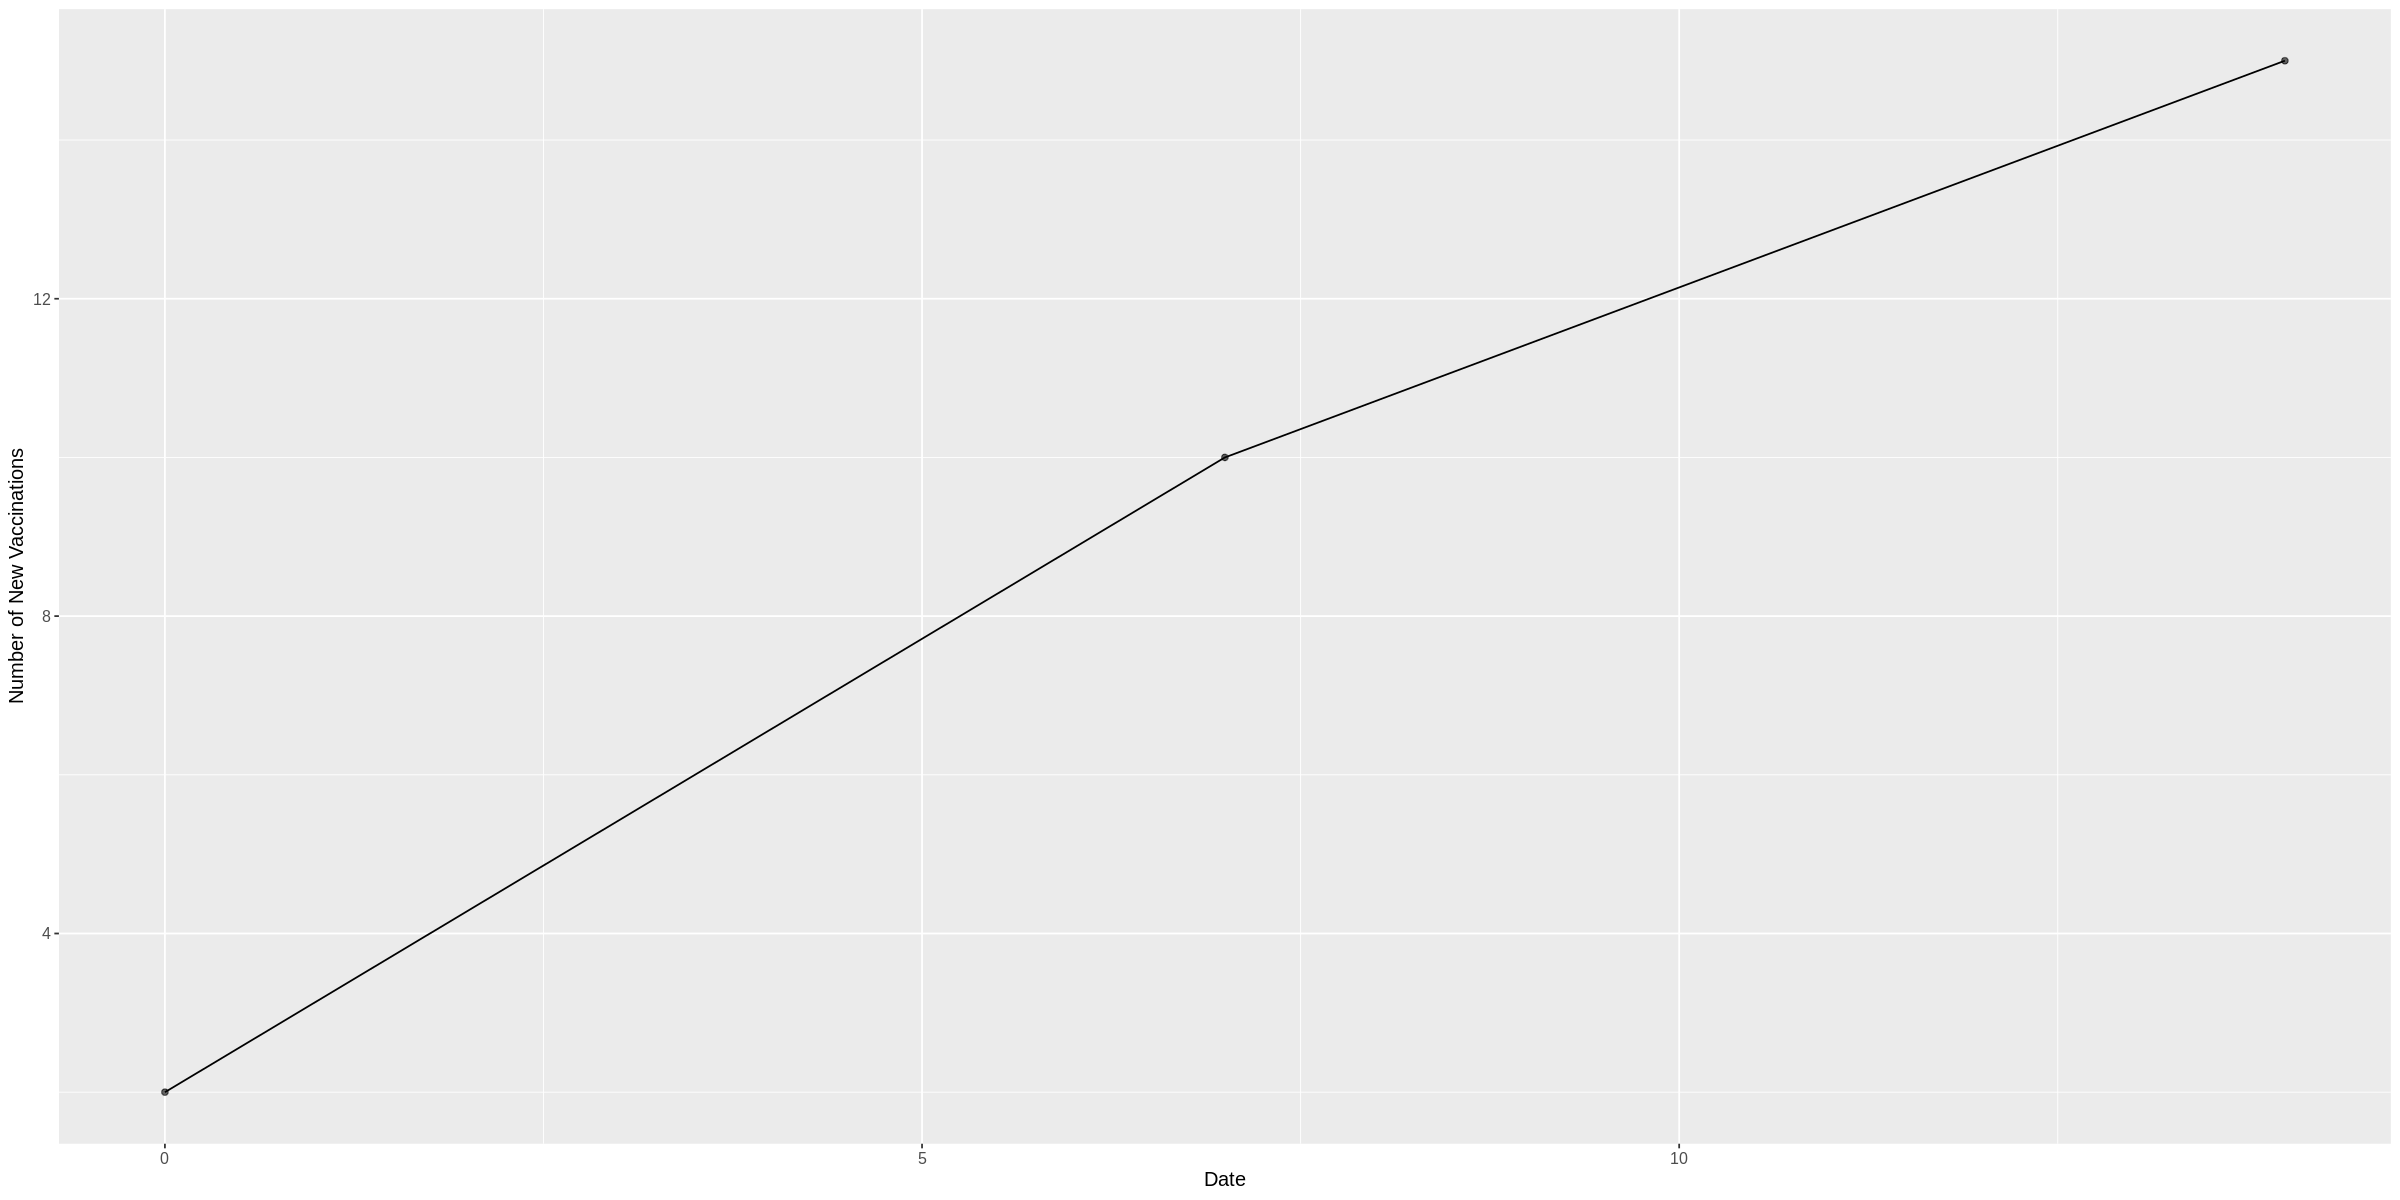

In [16]:
options(repr.plot.width = 20, repr.plot.height = 10)

firstage3<-newnewdata|>
#    mutate(age=as.factor(age))|>
    filter(age=="0–15")

graph3 <- ggplot(firstage3, aes(x=days, y=numtotal_atleast1dose))+
    geom_point(alpha=0.6)+
geom_line()+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    theme(text = element_text(size = 12))        

graph3

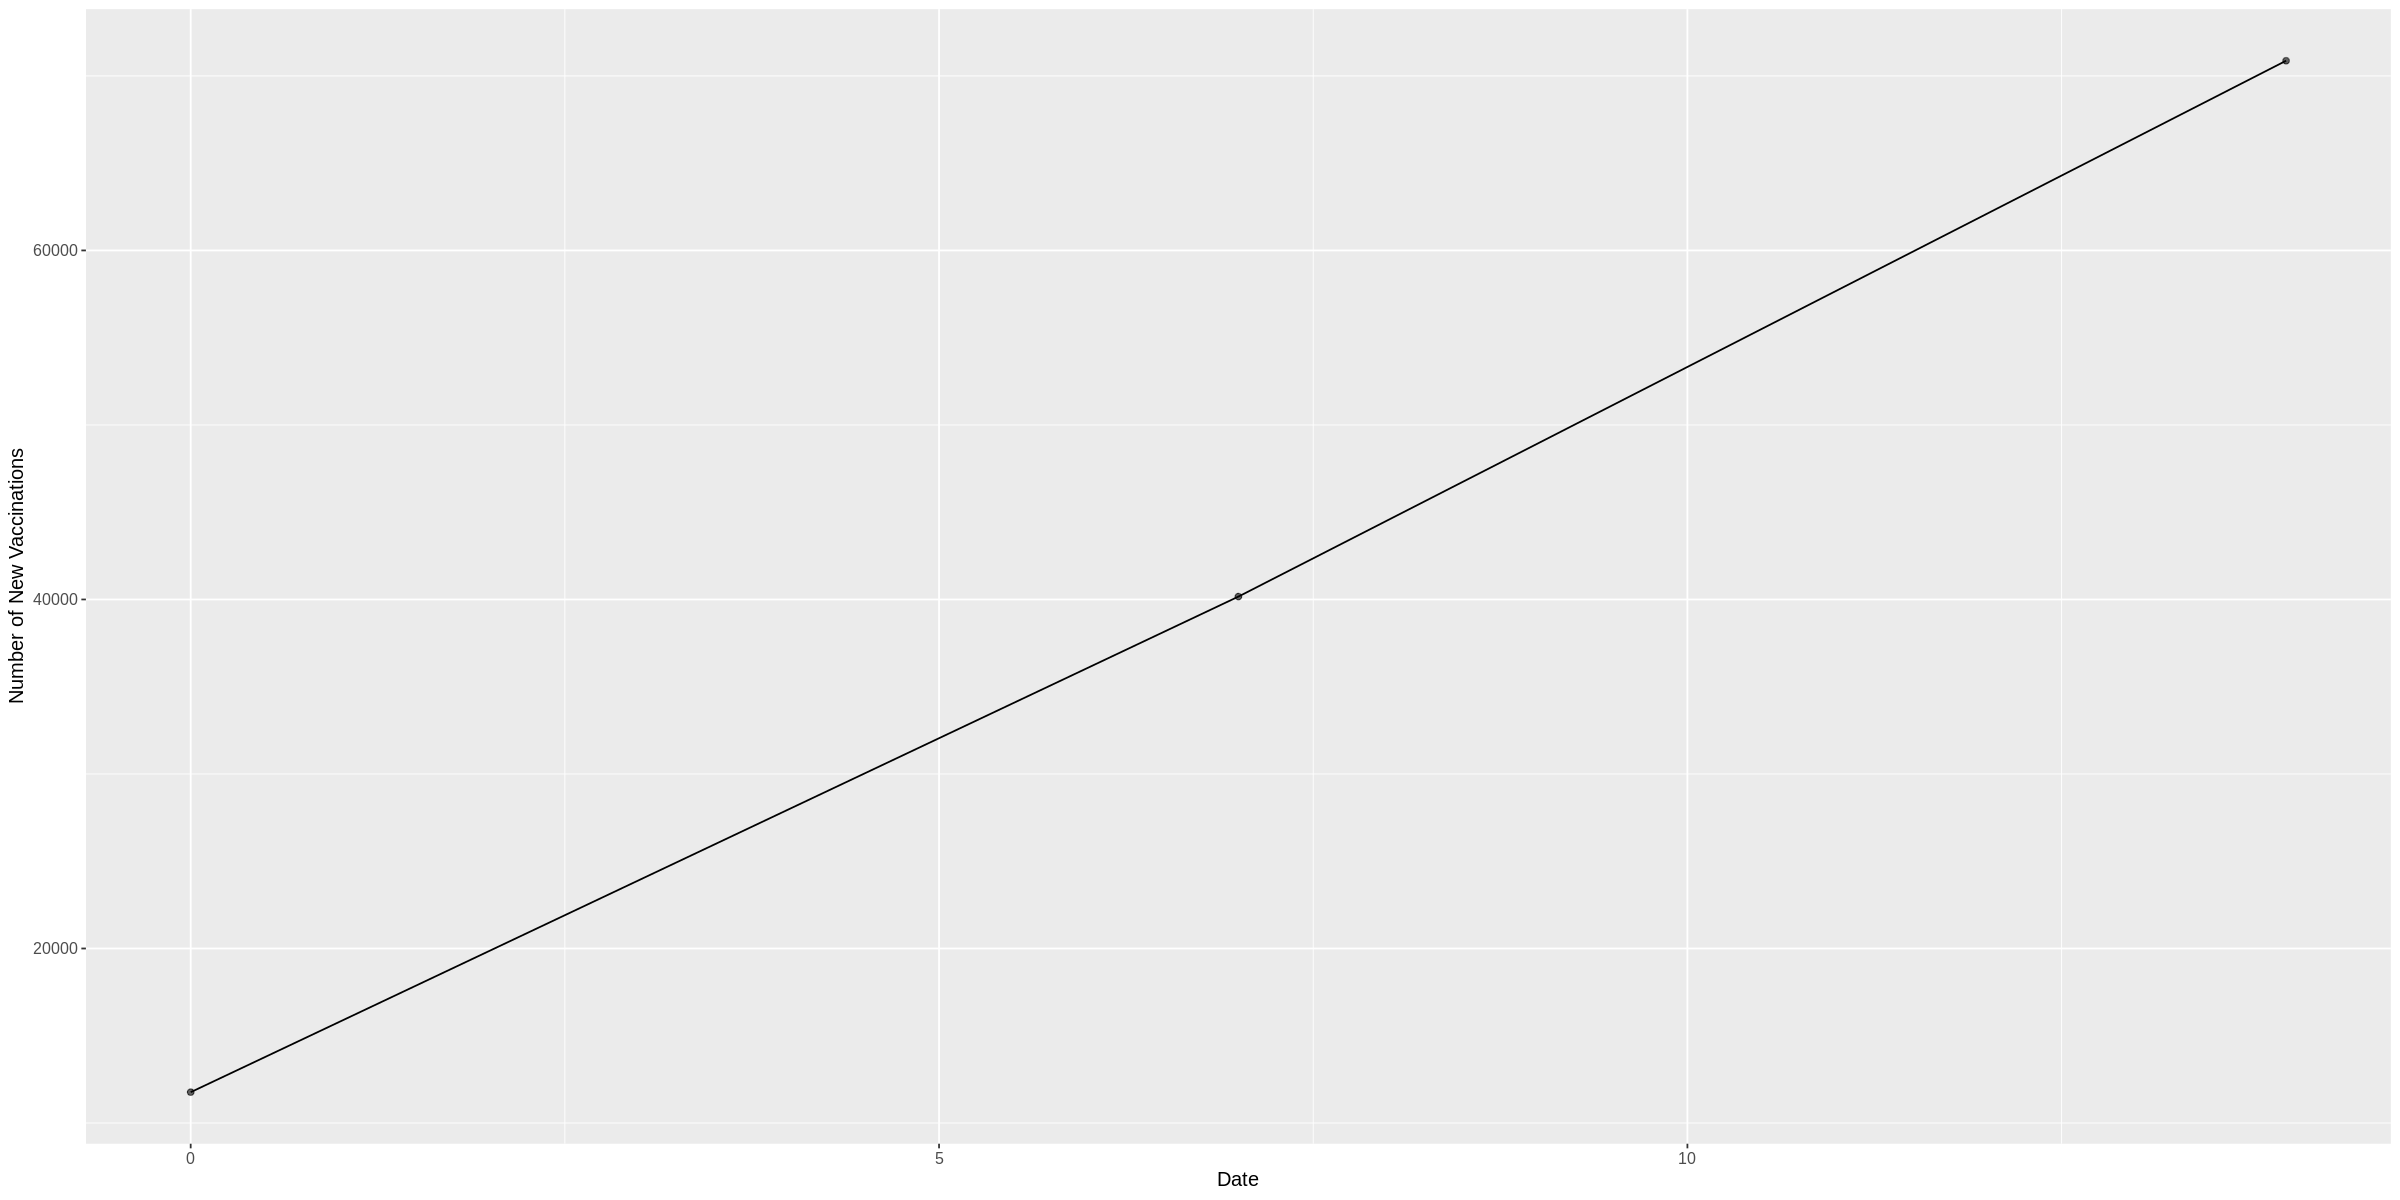

In [17]:
firstage4<-newnewdata|>
#    mutate(age=as.factor(age))|>
    filter(age=="16–69")

graph4 <- ggplot(firstage4, aes(x=days, y=numtotal_atleast1dose))+
    geom_point(alpha=0.6)+
geom_line()+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    theme(text = element_text(size = 12))        

graph4

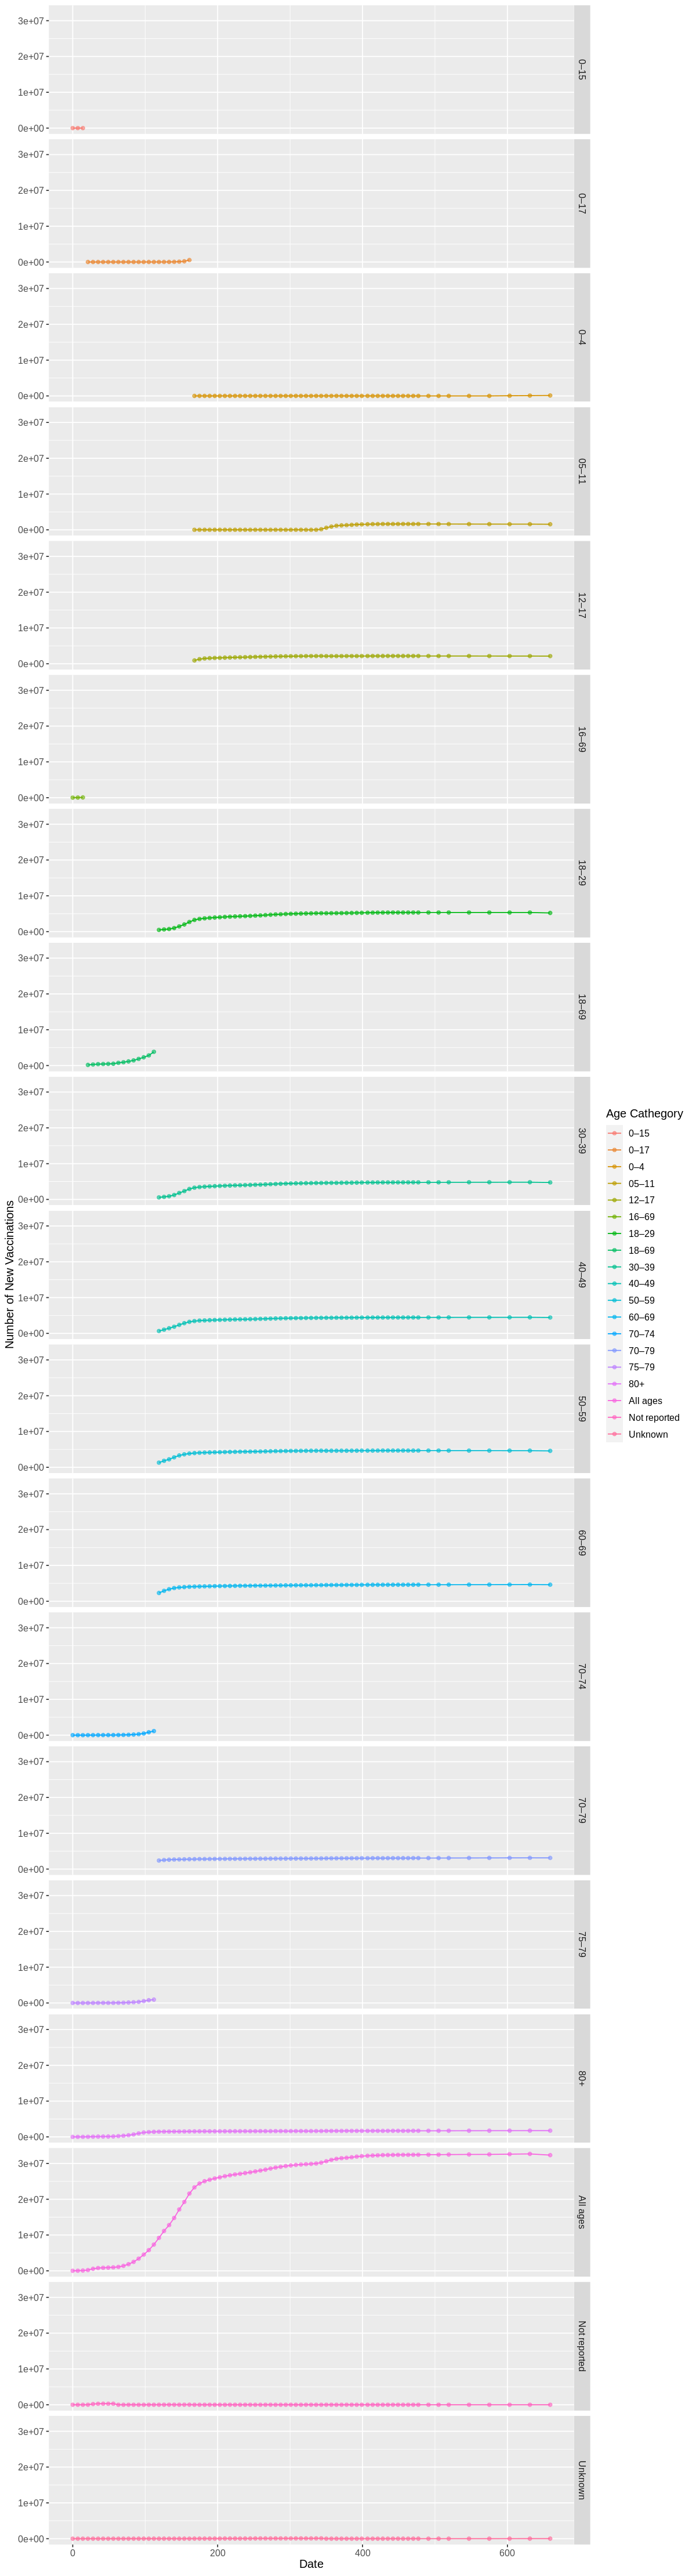

In [18]:
options(repr.plot.width = 10, repr.plot.height = 37)

#selected.1<- selected|>
# filter(age %in% c("0-4", "05-11", "12-17", "18-29", '30-39', '40-49', '50.59','60-69','70-79','80+'))

#selected.1<- selected|>
# filter(age %in% c("0-15", '0-17', '16-69', '18-69','70-74','75-79','80+'))

#selected.1

graph1.1 <- ggplot(newnewdata, aes(x=days, y=numtotal_atleast1dose, color=age))+
    geom_point(alpha=0.6)+
    geom_line()+
    facet_grid(rows = vars(age))+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    labs(color="Age Cathegory")+
    theme(text = element_text(size = 12))        

graph1.1